Environment && Library 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1

Configuration

In [2]:
epochs = 10
augmentation = True
save_model = True
save_plot = True

Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28 ,28, 1).astype(np.float32) / 255.0, x_test.reshape(-1, 28 ,28, 1).astype(np.float32) / 255.0

if(augmentation == True):
    model_path = "/home/x/Desktop/augmentation_functionAPI/"
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30, width_shift_range= 0.2, height_shift_range= 0.2, zoom_range= 0.2, data_format= 'channels_last', dtype= np.float32)
elif(augmentation == False):
    model_path = "/home/x/Desktop/Non_augmentation_functionAPI/"
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 0, width_shift_range= 0, height_shift_range= 0, zoom_range= 0, data_format= 'channels_last', dtype= np.float32)

train_gen.fit(x_train)
train_generator = train_gen.flow(x_train, y_train, batch_size=64, shuffle=True, seed=2, save_to_dir= None)
validation_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 30, width_shift_range= 0.2, height_shift_range= 0.2, zoom_range= 0.2, data_format= 'channels_last', dtype= np.float32)
validation_gen.fit(x_test)
validation_generator = validation_gen.flow(x_test, y_test, batch_size=64, shuffle=True, seed=2, save_to_dir= None)

Architecture

In [4]:
### layers ###
inputs = tf.keras.Input(shape=(28, 28, 1), name = "input")
C1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation="relu", name = "C1")
S2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name = "S2")
C3 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", name = "C3")
S4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name = "S4")
Flatten = tf.keras.layers.Flatten(name = "Flatten")
F5 = tf.keras.layers.Dense(120, activation='relu', name = "F5")
F6 = tf.keras.layers.Dense(84, activation='relu', name = "F6")
exit_1 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_1")
exit_2 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_2")
exit_3 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_3")
exit_4 = tf.keras.layers.Dense(10, activation='softmax', name = "exit_4")

### links ###
trunk = C1(inputs)      # input -> C1 
branch_1 = Flatten(trunk)
exit_1 = exit_1(branch_1)

trunk = S2(trunk)       # C1 -> S2
trunk = C3(trunk)       # S2 -> C3
branch_2 = Flatten(trunk)
exit_2 = exit_2(branch_2)

trunk = S4(trunk)       # C3 -> S4
trunk = Flatten(trunk)  # S4 -> Flatten
trunk = F5(trunk)       # Flatten -> F5
branch_3 = trunk
exit_3 = exit_3(branch_3)

trunk = F6(trunk)       # F5 -> F6
exit_4 = exit_4(trunk)

2023-04-16 01:36:22.143146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-16 01:36:22.164527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-16 01:36:22.164643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-16 01:36:22.165239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Training

In [5]:
model = tf.keras.Model(inputs = inputs, outputs = [exit_1, exit_2, exit_3, exit_4])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, steps_per_epoch= 600, epochs= epochs, validation_data= validation_generator, validation_steps= 100)

Epoch 1/10


/tmp/ipykernel_3567/1653327168.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch= 600, epochs= epochs, validation_data= validation_generator, validation_steps= 100)
2023-04-16 01:36:23.978766: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-16 01:36:25.348515: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


600/600 [==============================] - 9s 10ms/step - loss: 5.0411 - exit_1_loss: 1.5280 - exit_2_loss: 1.2425 - exit_3_loss: 1.1597 - exit_4_loss: 1.1108 - exit_1_accuracy: 0.4812 - exit_2_accuracy: 0.5901 - exit_3_accuracy: 0.6205 - exit_4_accuracy: 0.6265 - val_loss: 3.3607 - val_exit_1_loss: 1.2510 - val_exit_2_loss: 0.8156 - val_exit_3_loss: 0.6721 - val_exit_4_loss: 0.6220 - val_exit_1_accuracy: 0.5941 - val_exit_2_accuracy: 0.7405 - val_exit_3_accuracy: 0.7919 - val_exit_4_accuracy: 0.8014
Epoch 2/10
600/600 [==============================] - 6s 10ms/step - loss: 2.9560 - exit_1_loss: 1.1443 - exit_2_loss: 0.7129 - exit_3_loss: 0.5745 - exit_4_loss: 0.5243 - exit_1_accuracy: 0.6362 - exit_2_accuracy: 0.7834 - exit_3_accuracy: 0.8257 - exit_4_accuracy: 0.8356 - val_loss: 2.6248 - val_exit_1_loss: 1.0616 - val_exit_2_loss: 0.6168 - val_exit_3_loss: 0.4870 - val_exit_4_loss: 0.4594 - val_exit_1_accuracy: 0.6589 - val_exit_2_accuracy: 0.8041 - val_exit_3_accuracy: 0.8489 - val_e

Save Model

In [6]:
if(save_model == True):
    model.save(model_path, save_format= "tf")

INFO:tensorflow:Assets written to: /home/x/Desktop/augmentation_functionAPI/assets


INFO:tensorflow:Assets written to: /home/x/Desktop/augmentation_functionAPI/assets


Summary

In [7]:
model.summary()
print(model.dtype)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 C1 (Conv2D)                    (None, 24, 24, 6)    156         ['input[0][0]']                  
                                                                                                  
 S2 (AveragePooling2D)          (None, 12, 12, 6)    0           ['C1[0][0]']                     
                                                                                                  
 C3 (Conv2D)                    (None, 8, 8, 16)     2416        ['S2[0][0]']                     
                                                                                              

Chart

In [8]:
### architecture ###
if(save_plot == True):
    tf.keras.utils.plot_model(model, to_file= "/home/x/Desktop/architecture.png", show_shapes= True, show_layer_names= True, rankdir= "TB", dpi= 900, expand_nested= True)

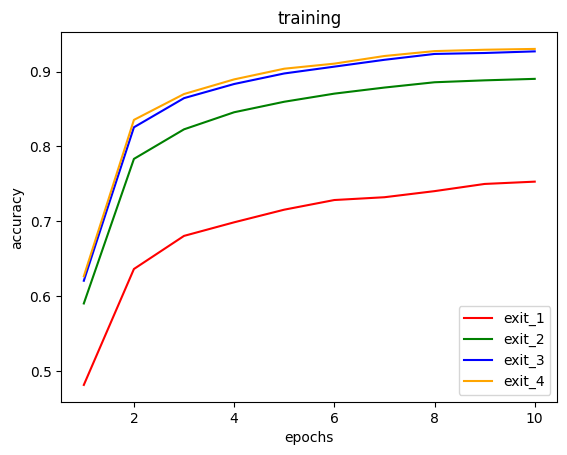

In [10]:
epochs = np.arange(1, epochs + 1)

plt.plot(epochs, history.history["exit_1_accuracy"], color= "red", marker= "", linestyle = "-", label= "exit_1")
plt.plot(epochs, history.history["exit_2_accuracy"], color= "green", marker= "", linestyle = "-", label= "exit_2")
plt.plot(epochs, history.history["exit_3_accuracy"], color= "blue", marker= "", linestyle = "-",  label= "exit_3")
plt.plot(epochs, history.history["exit_4_accuracy"], color= "orange", marker= "", linestyle = "-",  label= "exit_4")
plt.legend(loc = "lower right")
plt.title('training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


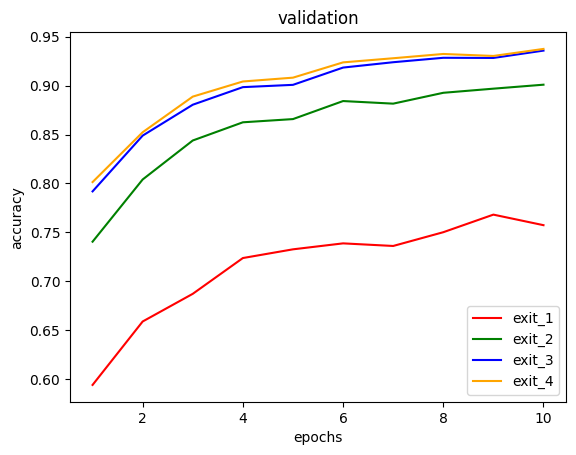

In [11]:
plt.plot(epochs, history.history["val_exit_1_accuracy"], color= "red", marker= "", linestyle = "-", label= "exit_1")
plt.plot(epochs, history.history["val_exit_2_accuracy"], color= "green", marker= "", linestyle = "-", label= "exit_2")
plt.plot(epochs, history.history["val_exit_3_accuracy"], color= "blue", marker= "", linestyle = "-",  label= "exit_3")
plt.plot(epochs, history.history["val_exit_4_accuracy"], color= "orange", marker= "", linestyle = "-",  label= "exit_4")
plt.title('validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')    
plt.legend(loc = "lower right")
plt.show()